# DSA5102X Project: Analyzing Pokemon Dataset

Sohei Arisaka (A0228235H)

## Abstract



## 1. Dataset

### 1.1. The Complete Pokemon Dataset
We use The Complete Pokemon Dataset from Kaggle ([link](https://www.kaggle.com/rounakbanik/pokemon)). 

>This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. 
The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. 

| Column| Description |
| :--- | :----------- |
|name| The English name of the Pokemon|
|japanese_name| The Original Japanese name of the Pokemon|
|pokedex_number| The entry number of the Pokemon in the National Pokedex|
|percentage_male| The percentage of the species that are male. Blank if the Pokemon is genderless.|
|type1| The Primary Type of the Pokemon|
|type2| The Secondary Type of the Pokemon|
|classification| The Classification of the Pokemon as described by the Sun and Moon Pokedex|
|height_m| Height of the Pokemon in metres|
|weight_kg| The Weight of the Pokemon in kilograms|
|capture_rate| Capture Rate of the Pokemon|
|baseeggsteps| The number of steps required to hatch an egg of the Pokemon|
|abilities| A stringified list of abilities that the Pokemon is capable of having|
|experience_growth| The Experience Growth of the Pokemon|
|base_happiness| Base Happiness of the Pokemon|
|against_?| Eighteen features that denote the amount of damage taken against an attack of a particular type|
|hp| The Base HP of the Pokemon|
|attack| The Base Attack of the Pokemon|
|defense| The Base Defense of the Pokemon|
|sp_attack| The Base Special Attack of the Pokemon|
|sp_defense| The Base Special Defense of the Pokemon|
|speed| The Base Speed of the Pokemon|
|generation| The numbered generation which the Pokemon was first introduced|
|is_legendary| Denotes if the Pokemon is legendary.|


In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

Let us check the data with some visualizations. There are 801 pokemons.

In [2]:
df = pd.read_csv("pokemon.csv")
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


We analyze the relationship between types and base stats (hp, attack, defense, sp_attack, sp_defense, speed).
There are 18 types presented below.

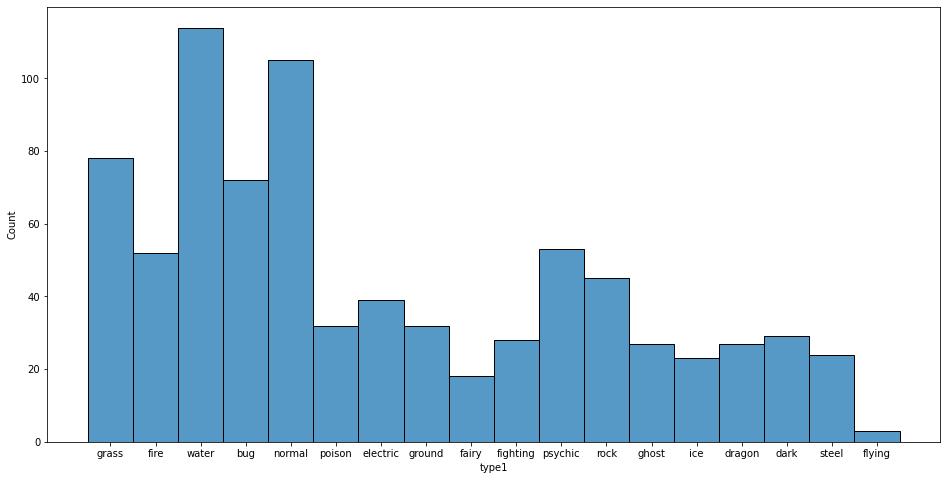

In [3]:
plt.figure(figsize=(16,8))
sns.histplot(data=df, x="type1");

In [4]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]

First, we draw scatter plots.

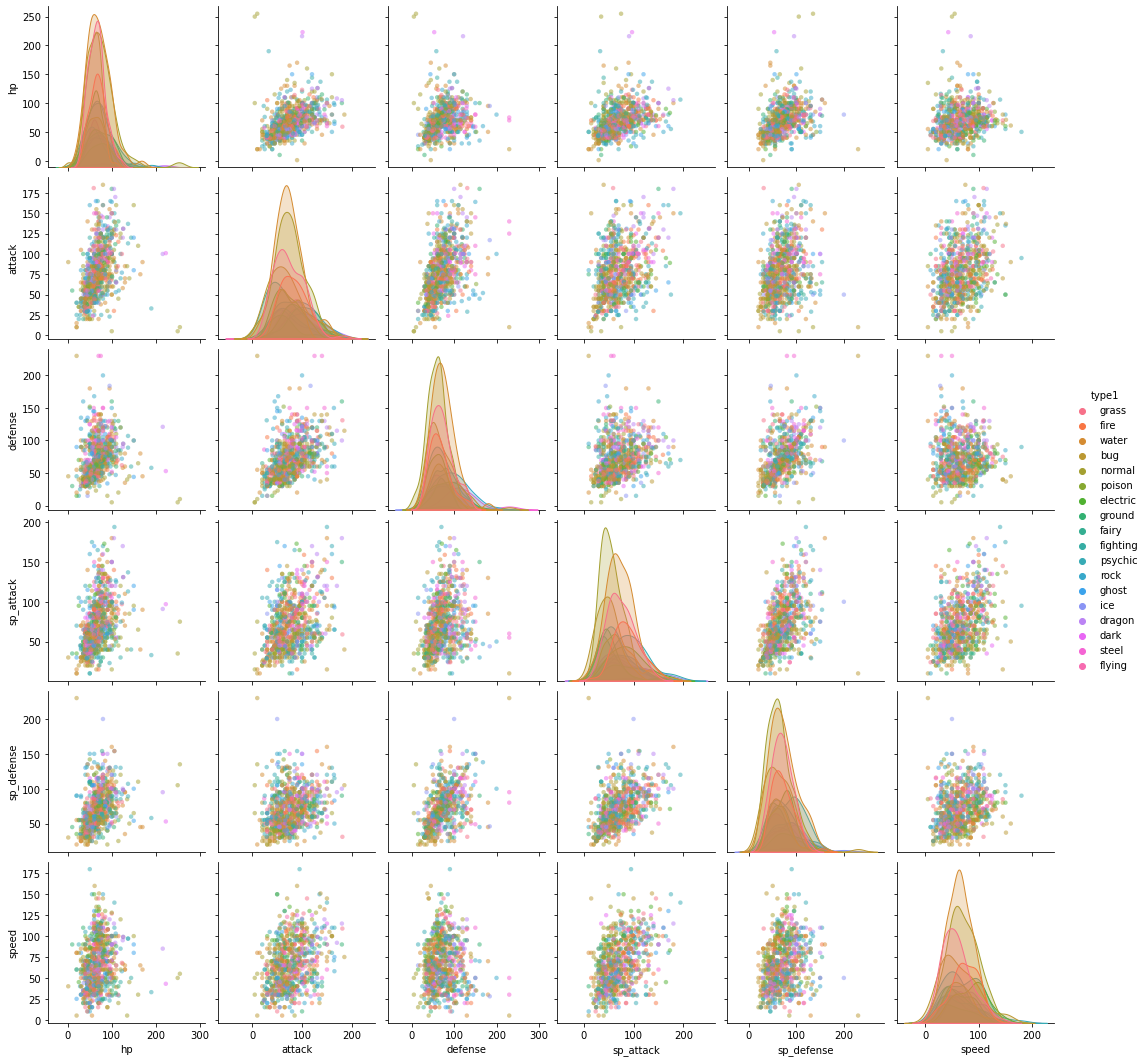

In [5]:
sns.pairplot(data = df[base_stats + ["type1"]],
             hue="type1",
             plot_kws={"alpha":0.5, "edgecolor":"none", "s":20});

It seems that each type has different stats distributions. Let us investigate the differences using violin plots.

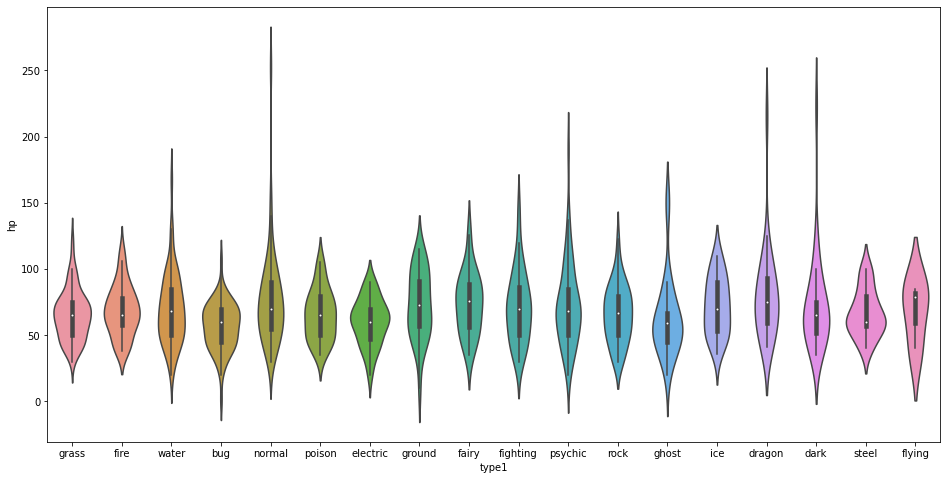

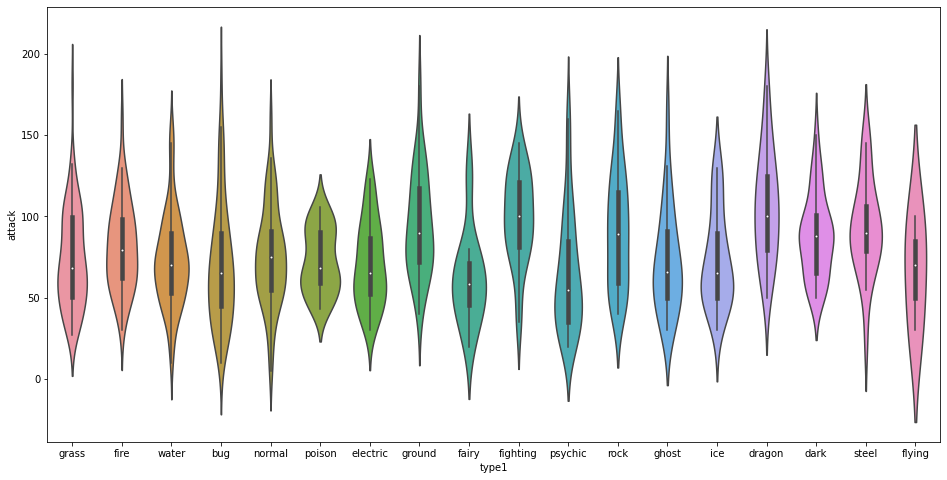

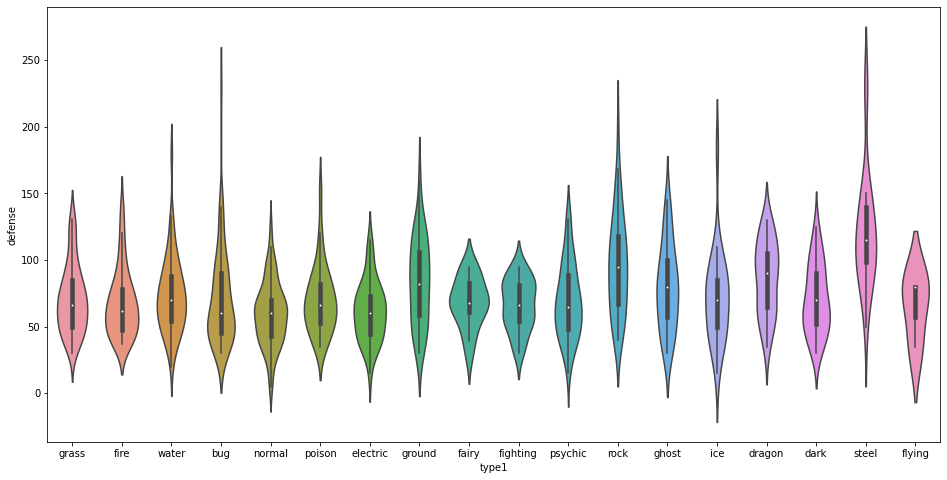

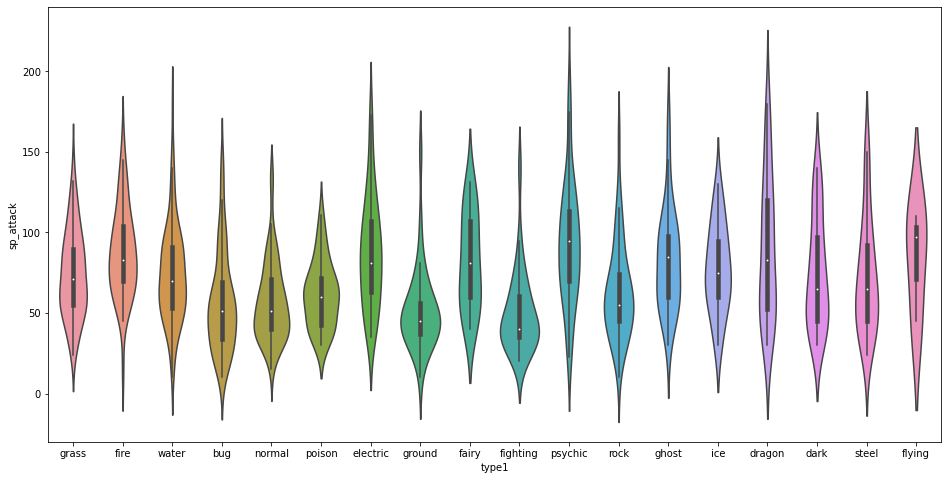

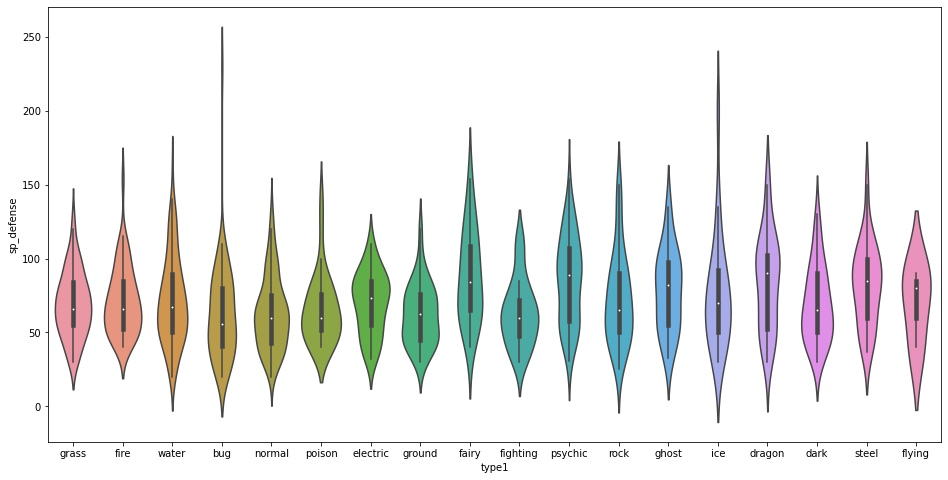

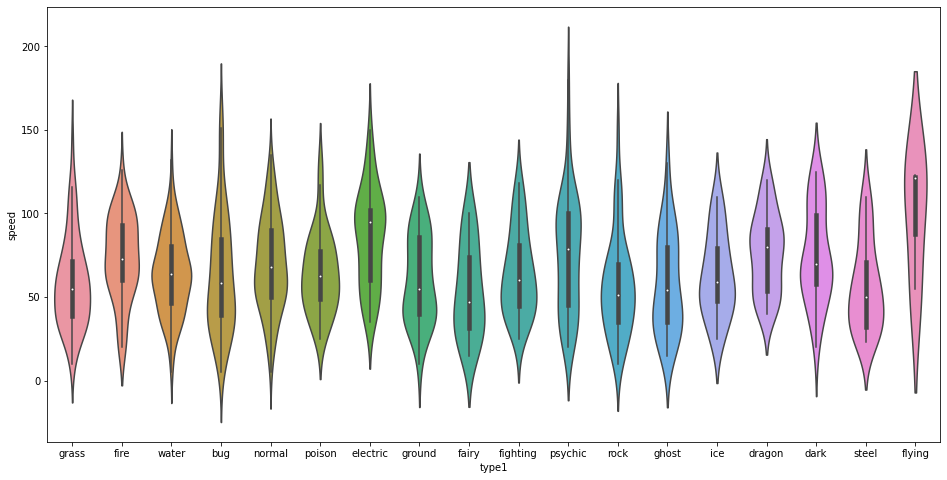

In [6]:
for param in base_stats:
    plt.figure(figsize=(16,8))
    sns.violinplot(data=df, x="type1", y=param)
    plt.show()

From the violin plots, we can see some interesting characteristics. 
For example, fighting and dragon type have higher attack than the others.
Also, steel and rock type have higher defense than the others.
These tendencies match our intuition.

Lastly, we use radar charts to describe the charcteristic of each type.

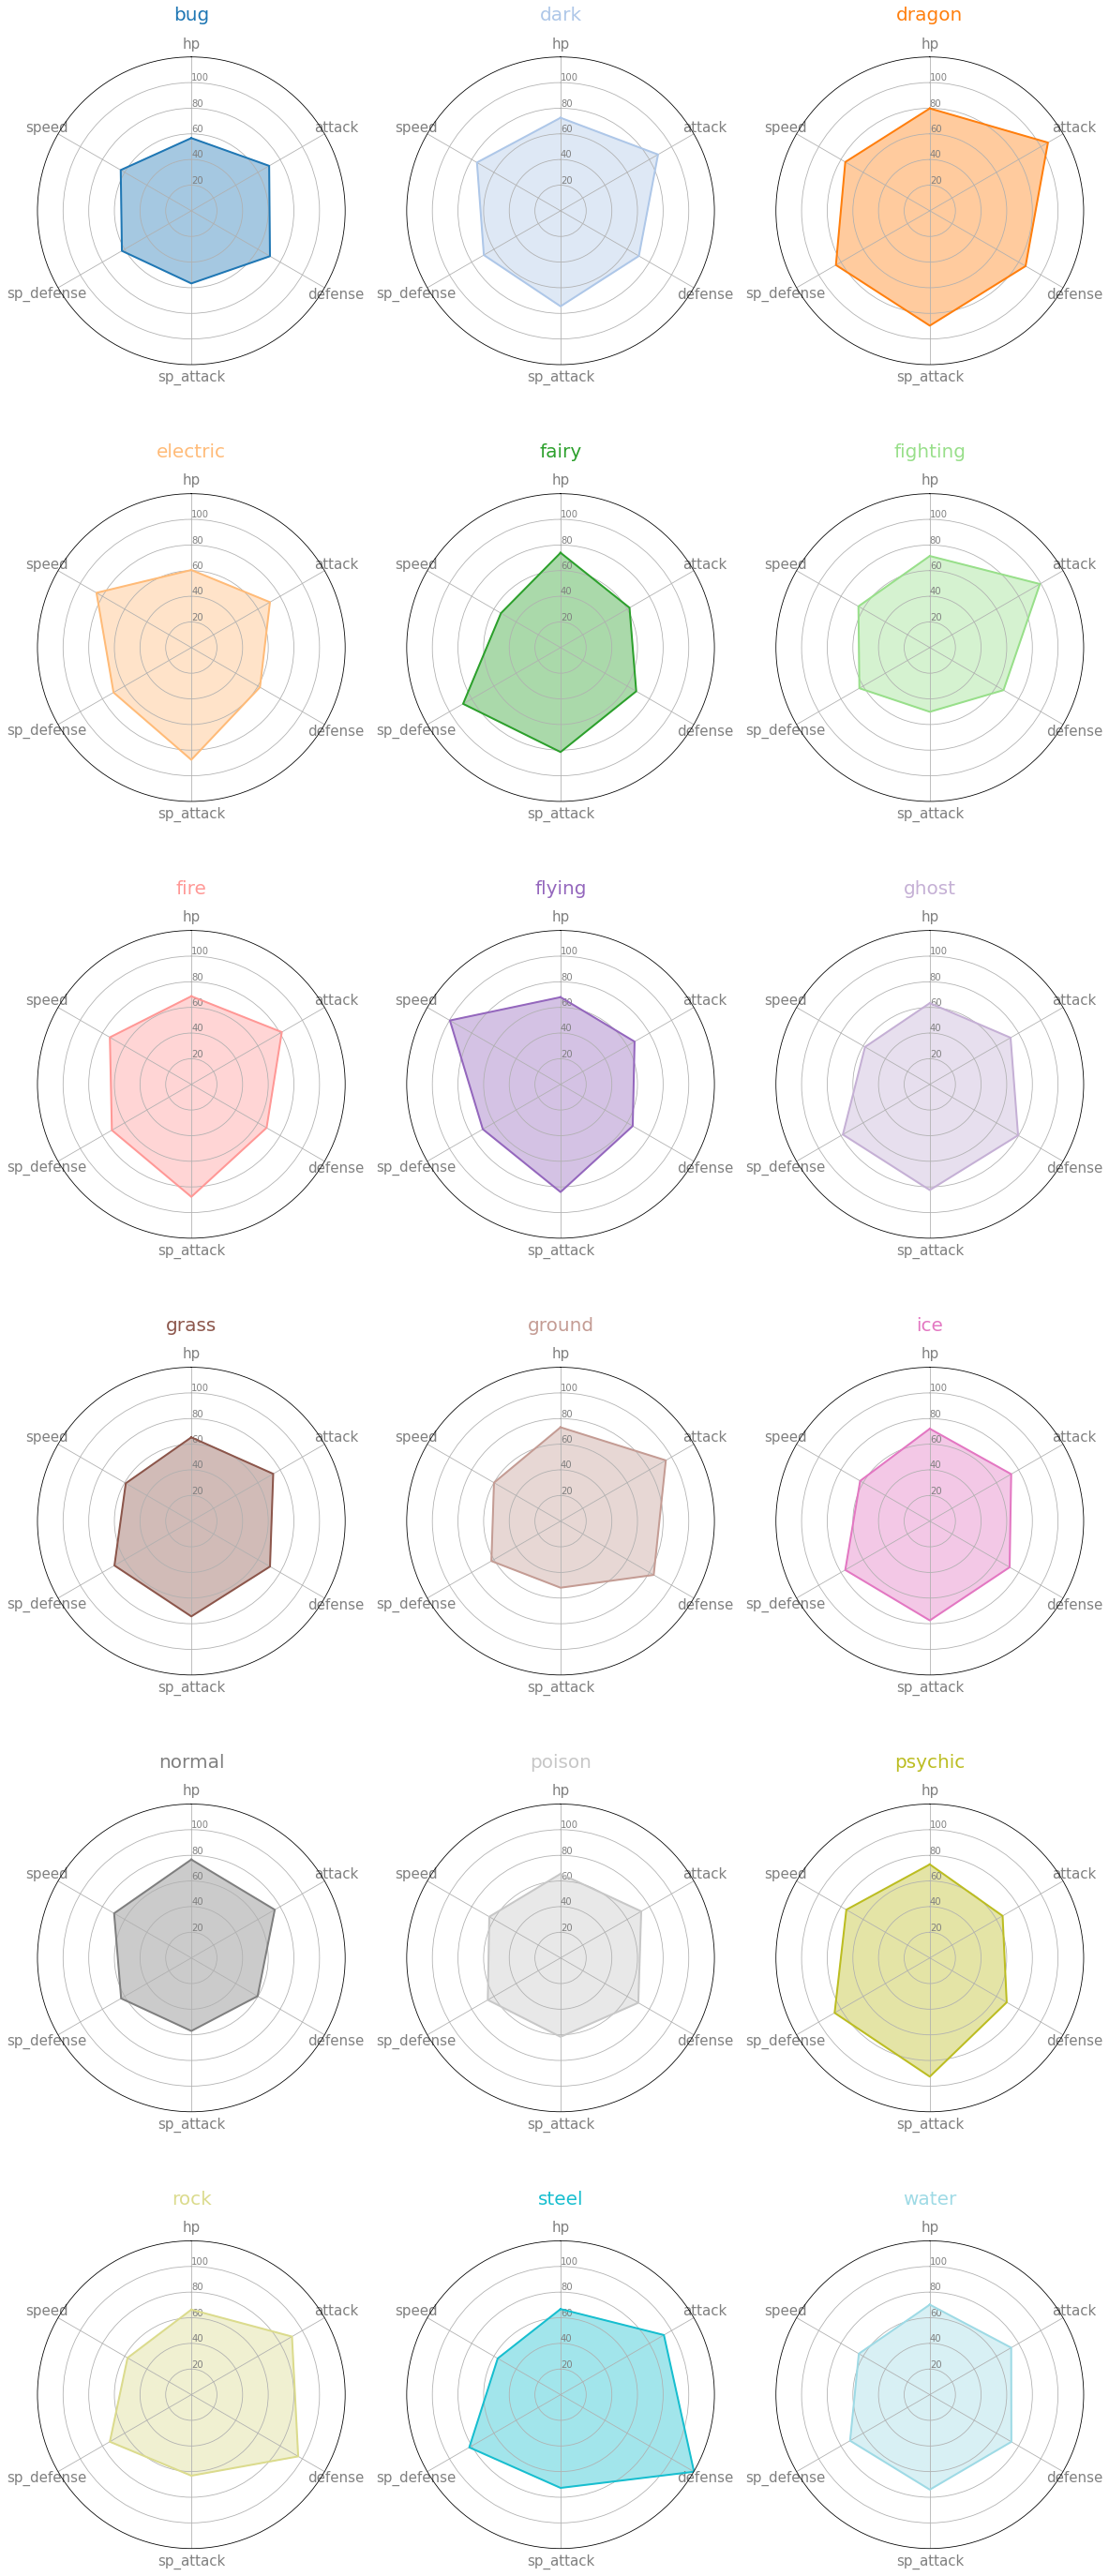

In [7]:
# Set data
df_mean = df.groupby("type1")[base_stats].mean().reset_index() # compute mean 

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df_mean)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80, 100], ["20","40","60", "80", "100"], color="grey", size=10)
    plt.ylim(0,120)

    # Ind1
    values=df_mean.loc[row].drop('type1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=20, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
plt.figure(figsize=(20, 50))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("tab20", len(df_mean.index))
 
# Loop to plot
for row in df_mean.index:
    make_spider( row=row, title=df_mean['type1'][row], color=my_palette(row))


### 1.2. Pokemon Images Dataset
In addition to The Complete Pokemon Dataset, we use Pokemon Images Dataset ([link](https://www.kaggle.com/kvpratama/pokemon-images-dataset)).
The images are stored in `./pokemon_jpg` directory.
The size of images is 256 by 256.
Let us see some pokemons.

Caterpie


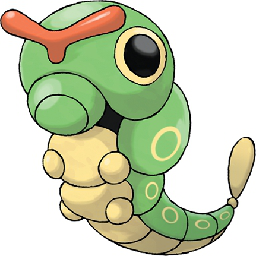

Voltorb


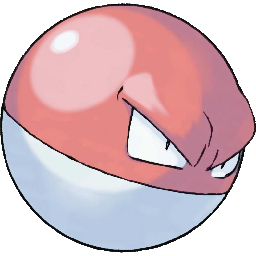

Skitty


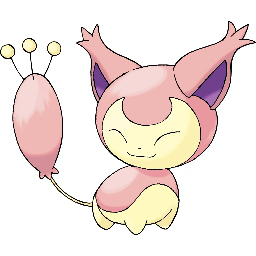

In [8]:
from PIL import Image
from IPython.display import display

img_dir = "./pokemon_jpg"
for poke_idx in [10, 100, 300]:
    img_path = os.path.join(img_dir, str(poke_idx) + '.jpg')
    im = Image.open(img_path)
    print(df.loc[poke_idx-1,"name"])
    display(im)

## 2. Supervised learning
In this section, we consider a classification problem, which is to predict pokemon's primary type (`type1`) from their other information.

In [195]:
!pip install chars2vec

     |████████████████████████████████| 8.1 MB 9.5 MB/s eta 0:00:01
  Created wheel for chars2vec: filename=chars2vec-0.1.7-py3-none-any.whl size=8111095 sha256=0cb7d7319238412d1f61501c118a2a1c2a57a276086c3de4e405c418177b53e2
  Stored in directory: /Users/sohei/Library/Caches/pip/wheels/17/64/ea/f1f2cda4c0864aee0151911b8e29e178132216b2198900dd33
Successfully built chars2vec


In [ ]:
import chars2vec
c2v_model = chars2vec.load_model('eng_50')

In [184]:
df = pd.read_csv("pokemon.csv")
# We do not use against_x because they are computed from type.
df = df.drop(['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water',], axis='columns')

In [185]:
df = pd.get_dummies(df, columns=['type2'])
df["num_abilities"] = list(map(len, df.abilities.str.split(",")))
df["len_name"] = list(map(len, df.name))

X = df.loc[:, df.dtypes != object]
y = df.type1

In [186]:
# split dataset to training set and test set using stratify option to keep target ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=df.type1,
                                                    shuffle=True,
                                                    test_size=0.2,
                                                    random_state=0)

In [187]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# model = LogisticRegression(max_iter=10000, class_weight="balanced")
model = RandomForestClassifier(class_weight='balanced', max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [189]:
model.score(X_train, y_train)

0.95625

In [190]:
model.score(X_test, y_test)

0.3167701863354037

In [191]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         bug       0.47      0.50      0.48        14
        dark       0.33      0.50      0.40         6
      dragon       0.43      0.60      0.50         5
    electric       0.33      0.62      0.43         8
       fairy       0.50      0.50      0.50         4
    fighting       0.25      0.17      0.20         6
        fire       0.18      0.20      0.19        10
      flying       0.00      0.00      0.00         1
       ghost       0.00      0.00      0.00         5
       grass       0.15      0.12      0.14        16
      ground       0.20      0.33      0.25         6
         ice       0.50      0.60      0.55         5
      normal       0.40      0.38      0.39        21
      poison       0.00      0.00      0.00         6
     psychic       0.29      0.45      0.36        11
        rock       0.60      0.67      0.63         9
       steel       0.00      0.00      0.00         5
       water       0.14    

/Users/sohei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sohei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sohei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


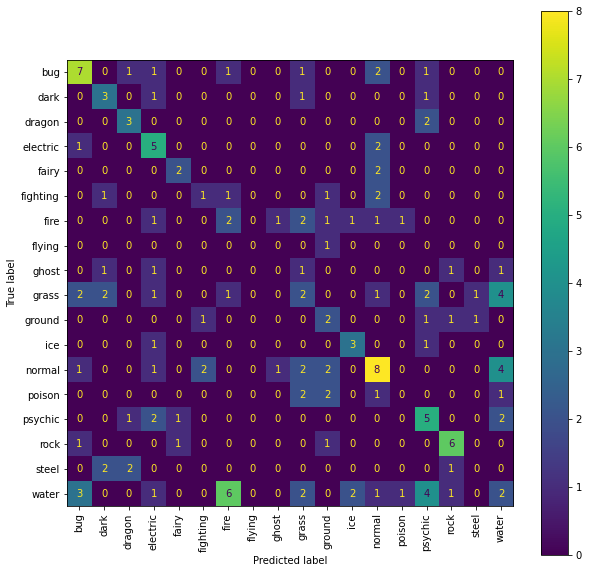

In [192]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation="vertical");
